In [1]:
import numpy as np
import os
from local_vars import root_folder
import matplotlib.pyplot as plt

In [2]:
output_file = r"NeedleCapture_Tofu_02_"

image1_folder = r"\Ultrasound\NeedleCapture\2020-03-16-NeedleCapture-Medium\1Slice\Results"
image2_folder = r"\Ultrasound\NeedleCapture\2020-03-16-NeedleCapture-Medium\1Slice\Results"
output_folder = r"\Ultrasound\NeedleCapture\2020-03-16-NeedleCapture-Medium\1Slice\Results"
image_tofu_file = r"\Ultrasound\NeedleCapture\2020-03-16-NeedleCapture-Medium\Empty_Tofu_ultrasound_1d.npy"

image1_fullpath = os.path.join(root_folder, image1_folder)
image2_fullpath = os.path.join(root_folder, image2_folder)
output_fullpath = os.path.join(root_folder, output_folder)
image_tofu_fullpath = os.path.join(root_folder, image_tofu_file)

image1_file_list = [f for f in os.listdir(image1_fullpath) if f.endswith('_generated.npy')]
image2_file_list = [f for f in os.listdir(image2_fullpath) if f.endswith('_target.npy')]

num_images1 = len(image1_file_list)
#num_images2 = len(image2_file_list)

print( "Found {} generated image files".format(num_images1) )
#print( "Found {} target image files".format(num_images2) )

#Load "base" image and normalize between 0 and 1
image_tofu = np.load(image_tofu_fullpath)[:,:,0]
image_tofu = image_tofu / np.max(image_tofu)

Found 545 generated image files


In [3]:
# plot source, generated, and target images
def plot_images(img1, img2, img3):
    images = np.dstack((img1, img2, img3))
    print(images.shape)
    # scale from [-1,1] to [0,1]
    images = (images + 1) / 2.0
    titles = ["generated", "target", 'Combined (max)']
    # plot images row by row
    for i in range(3):
        # define subplot
        plt.subplot(3, 7, 1 + i)
        # turn off axis
        plt.axis('off')
        # plot raw pixel data
        plt.imshow(images[:,:,i])
        # show title
        plt.title(titles[i])
    plt.show()

(512, 512, 3)


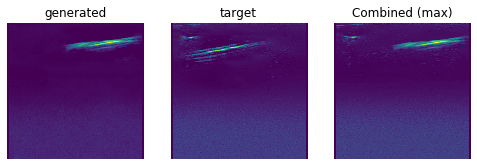

(512, 512, 3)


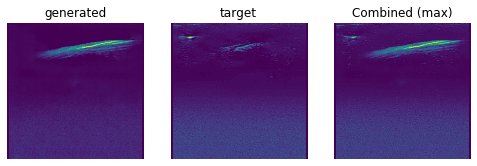

(512, 512, 3)


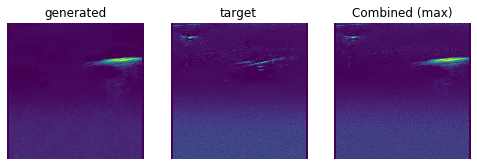

(512, 512, 3)


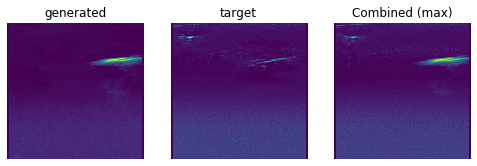

(512, 512, 3)


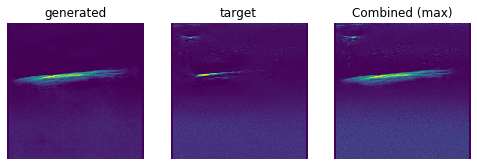

(512, 512, 3)


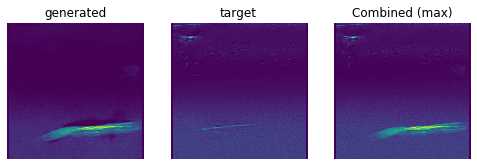

In [4]:
for ix in range(num_images1):
    #Load generated image and normalize between 0 and 1
    image1 = np.load( os.path.join(image1_fullpath, image1_file_list[ix]) )
    image1 = (image1 + 1) / 2.0
    image1 = image1 / np.max(image1)
    
    #Take max at each pixel
    combined_image = np.maximum(image1, image_tofu)
    
    #Export combined image
    np.save( os.path.join(output_fullpath, "NeedleCapture_Tofu_02_{:03d}_combined.npy".format(ix)), combined_image )
    
    #Visualize
    if ix % 100 == 0:
        #Load target image
        image2 = np.load( os.path.join(image2_fullpath, image2_file_list[ix]) )
        plt.rcParams["figure.figsize"]=20,20
        plot_images(image1, image2, combined_image)